In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,FunctionTransformer,power_transform
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
!pip install mlrose
!pip install scikit-pyplot
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
!pip install scikit-plot
import scikitplot as skplt
from lightgbm import LGBMClassifier
!pip install kmeans-smote
from kmeans_smote import KMeansSMOTE
!pip install pyfiglet
import pyfiglet

  Moving to c:\users\r p shukla\anaconda3\lib\site-packages\numpy\polynomial\__pycache__\hermite.cpython-38.pyc
   from C:\Users\R P SHUKLA\AppData\Local\Temp\pip-uninstall-an_aaon1\polynomial\__pycache__\hermite.cpython-38.pyc
  Moving to c:\users\r p shukla\anaconda3\lib\site-packages\numpy\polynomial\__pycache__\hermite_e.cpython-38.pyc
   from C:\Users\R P SHUKLA\AppData\Local\Temp\pip-uninstall-an_aaon1\polynomial\__pycache__\hermite_e.cpython-38.pyc
  Moving to c:\users\r p shukla\anaconda3\lib\site-packages\numpy\polynomial\__pycache__\laguerre.cpython-38.pyc
   from C:\Users\R P SHUKLA\AppData\Local\Temp\pip-uninstall-an_aaon1\polynomial\__pycache__\laguerre.cpython-38.pyc
  Moving to c:\users\r p shukla\anaconda3\lib\site-packages\numpy\polynomial\__pycache__\legendre.cpython-38.pyc
   from C:\Users\R P SHUKLA\AppData\Local\Temp\pip-uninstall-an_aaon1\polynomial\__pycache__\legendre.cpython-38.pyc
  Moving to c:\users\r p shukla\anaconda3\lib\site-packages\numpy\polynomial\__p

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [11]:
data.shape

(1000, 40)

In [12]:
data.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [14]:
{column:len(data[column].unique()) for column in data.columns if data[column].dtypes=='object'}

{'policy_bind_date': 951,
 'policy_state': 3,
 'policy_csl': 3,
 'insured_sex': 2,
 'insured_education_level': 7,
 'insured_occupation': 14,
 'insured_hobbies': 20,
 'insured_relationship': 6,
 'incident_date': 60,
 'incident_type': 4,
 'collision_type': 4,
 'incident_severity': 4,
 'authorities_contacted': 5,
 'incident_state': 7,
 'incident_city': 7,
 'incident_location': 1000,
 'property_damage': 3,
 'police_report_available': 3,
 'auto_make': 14,
 'auto_model': 39,
 'fraud_reported': 2}

In [15]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Missing value found in last column and its seems to be empty would rather drop it.

# DATA PREPROCESSING

##### FEATURE ENGINNEERING

In [16]:
def preprocess1(df):
  df=df.copy()
  df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
  df['policy_bind_year']=df['policy_bind_date'].dt.year
  df['policy_bind_month']=df['policy_bind_date'].dt.month
  df['policy_bind_day']=df['policy_bind_date'].dt.day
  df.drop(['_c39','policy_bind_date','incident_location','incident_date'],axis=1,inplace=True)
  return df

In [17]:
data=preprocess1(data)

In [18]:
col=['authorities_contacted','auto_make','auto_model','collision_type','fraud_reported','incident_city','incident_severity','incident_state',
'incident_type','insured_education_level','insured_hobbies','insured_occupation','insured_relationship','insured_sex','police_report_available',
'policy_csl','policy_state','property_damage','policy_bind_year','policy_bind_month']

# Univariate Analysis

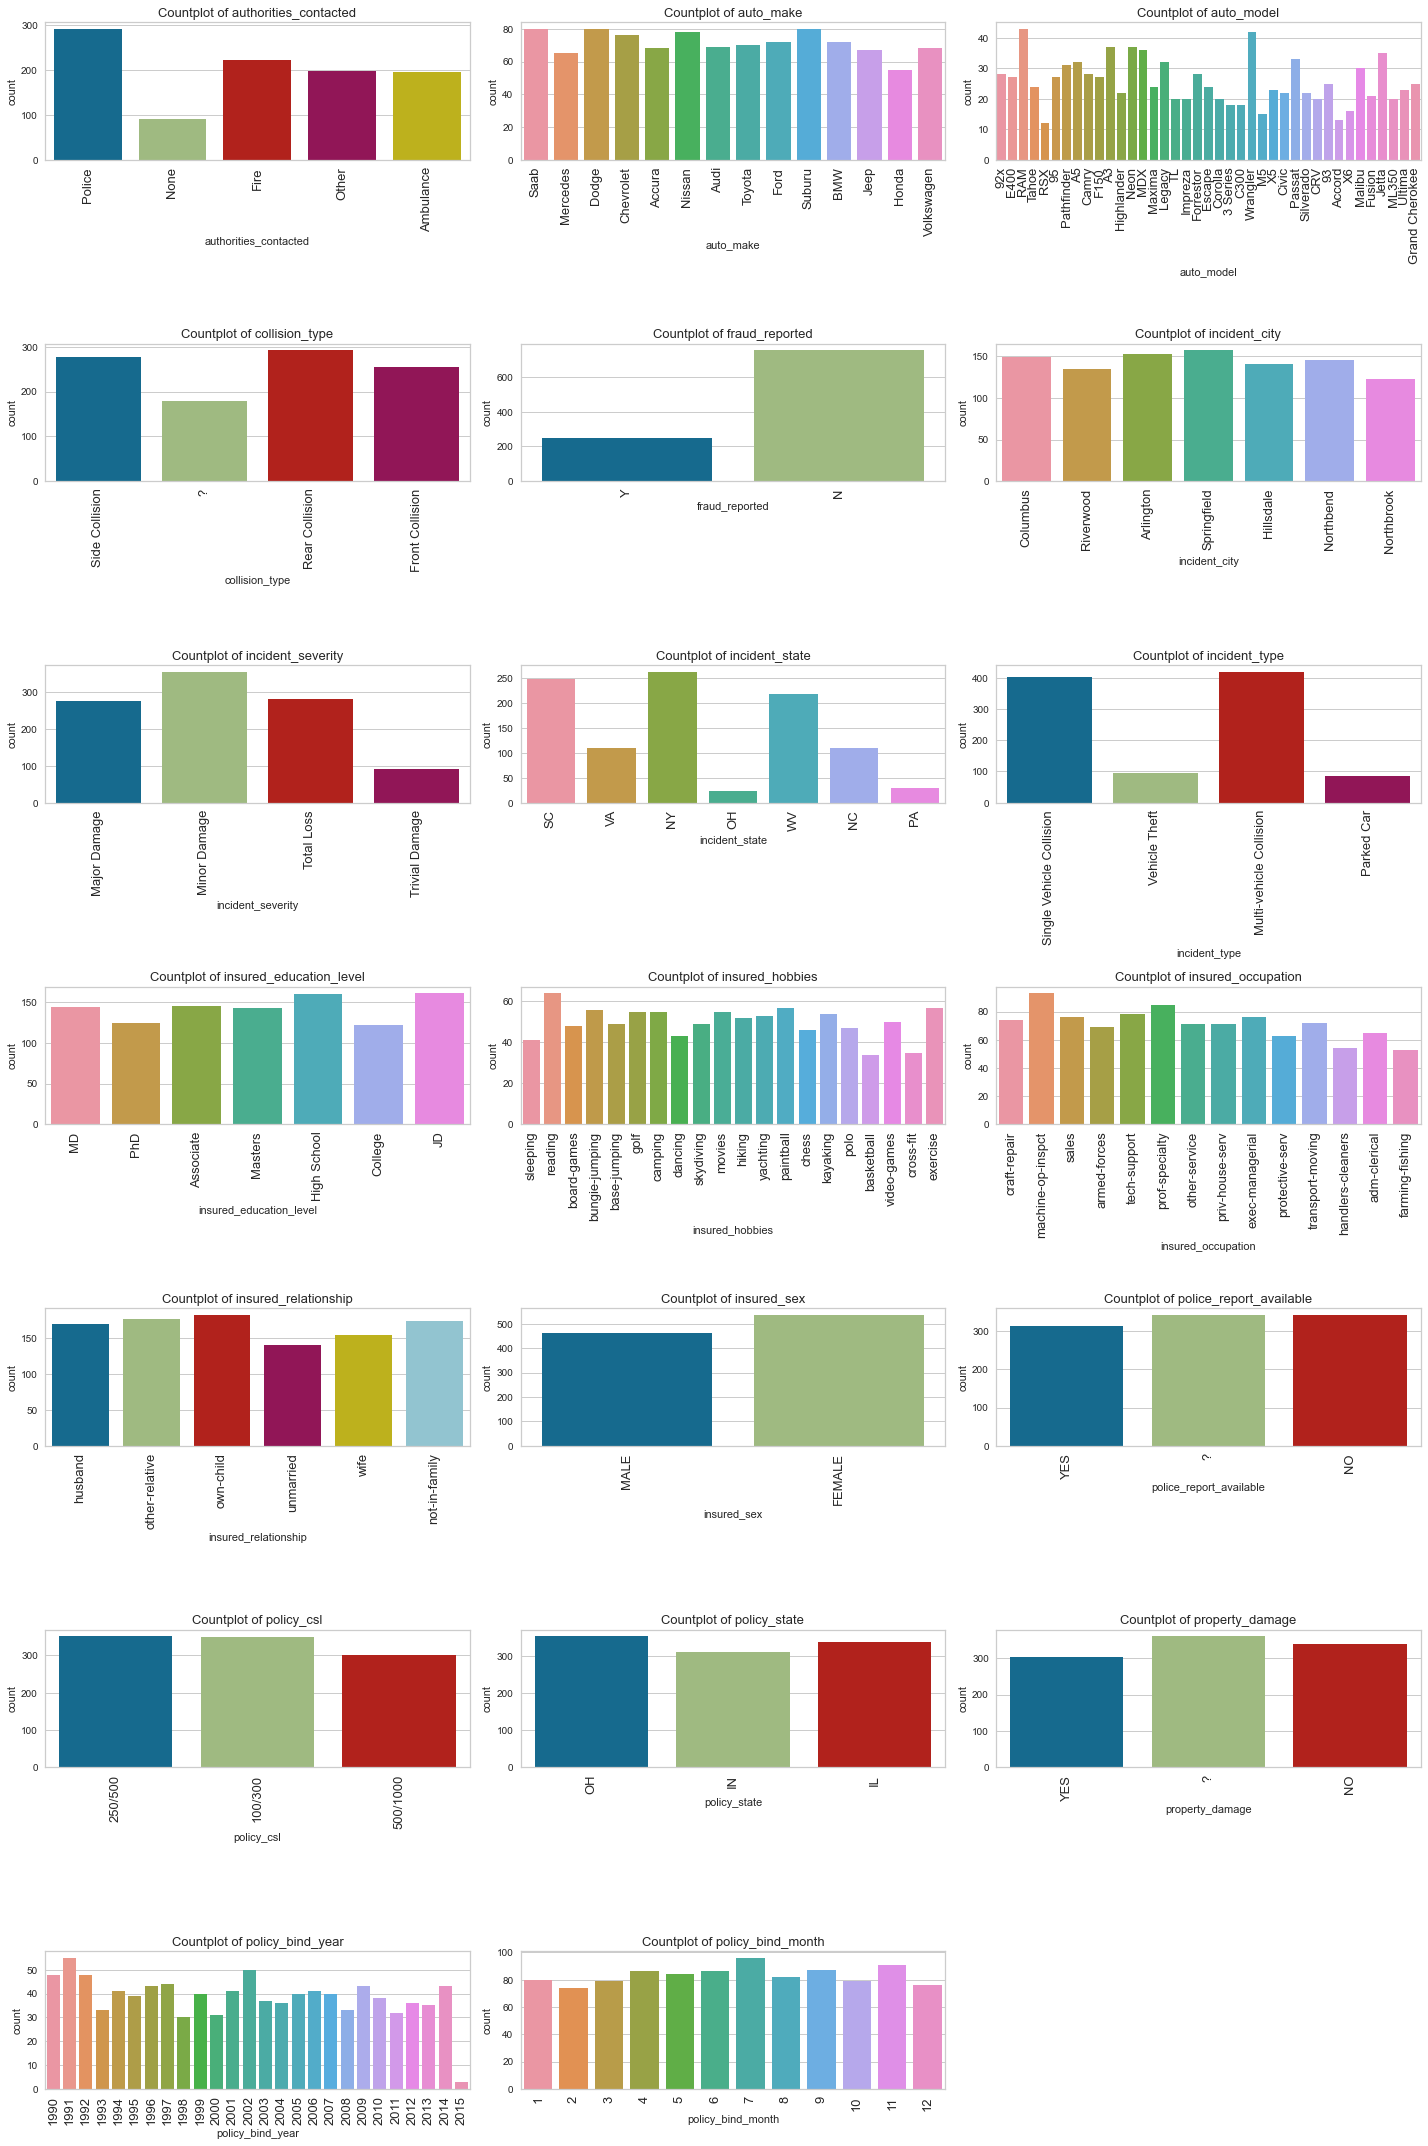

In [19]:
plt.figure(figsize=(20,65))
for i in range(len(col)):
  plt.subplot(15,3,i+1)
  sns.countplot(data[col[i]])
  plt.title(f"Countplot of {col[i]}",fontsize=13)
  plt.xticks(rotation=90,fontsize=13)
  plt.tight_layout()

1-From countplot authorities_contacted Police has the highest count followed by fire.In most of the cases people 
  have contacted police first.

2-From countplot auto_make Saab,Suburu,Dodge has the highest count in production of automobiles.

3-From countplot auto_modal RAM and Wrangler has the highest count. 

4-From countplot collision_type rear collision has highest count.

5-From countplot Fraud Reported maximum number of fraud has'nt been reported or claimed.

6-From countplot incident_city Springfield has highest count whereas Northbrook has least count among all.

7-From countplot incident_severity Minor damange has highest count means mostly people claim insurance for minor damage.

8-From countplot incident_state New york has the highest count means most of the accident happens there.

9-From countplot incident type Multi-vehicle Collision and Single-vehicle Collision has the highest count means most of the accident happens with multiple vehicle and singlw vehicle and very less accident happens with park cars

10-From countplot insured education JD and High school has highest count.

11-From countplot insured_hobbies reading is most popular among all others.

12-From countplot insured_occupation machine-op-inspct has highest count means most of the people who claim insurance has this occupation and people who have farming-fishing occupation has less claim insurance.

13-From countplot insured_relationship own-child has highest count means most of the people who have claimed insurance has child and unmaried has the least count.

14-From countplot insured sex male are less and  female are high means people who have sex female has claimed insurance more than male.

15-From countplot policy cls 250/500 and 100/300 has same high count and 500/100 has less count.

16-From countplot policy state IN has less count and Il and ch has same high count.

17-From countplot property damage ? and No has high count and yes has less count.

18-From countplot policy bind year most of the  people have taken policy in 1991 and 2002 and only few people have taken policy in 2015.

In [20]:
col1=['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'policy_bind_year', 'policy_bind_month',
       'policy_bind_day']

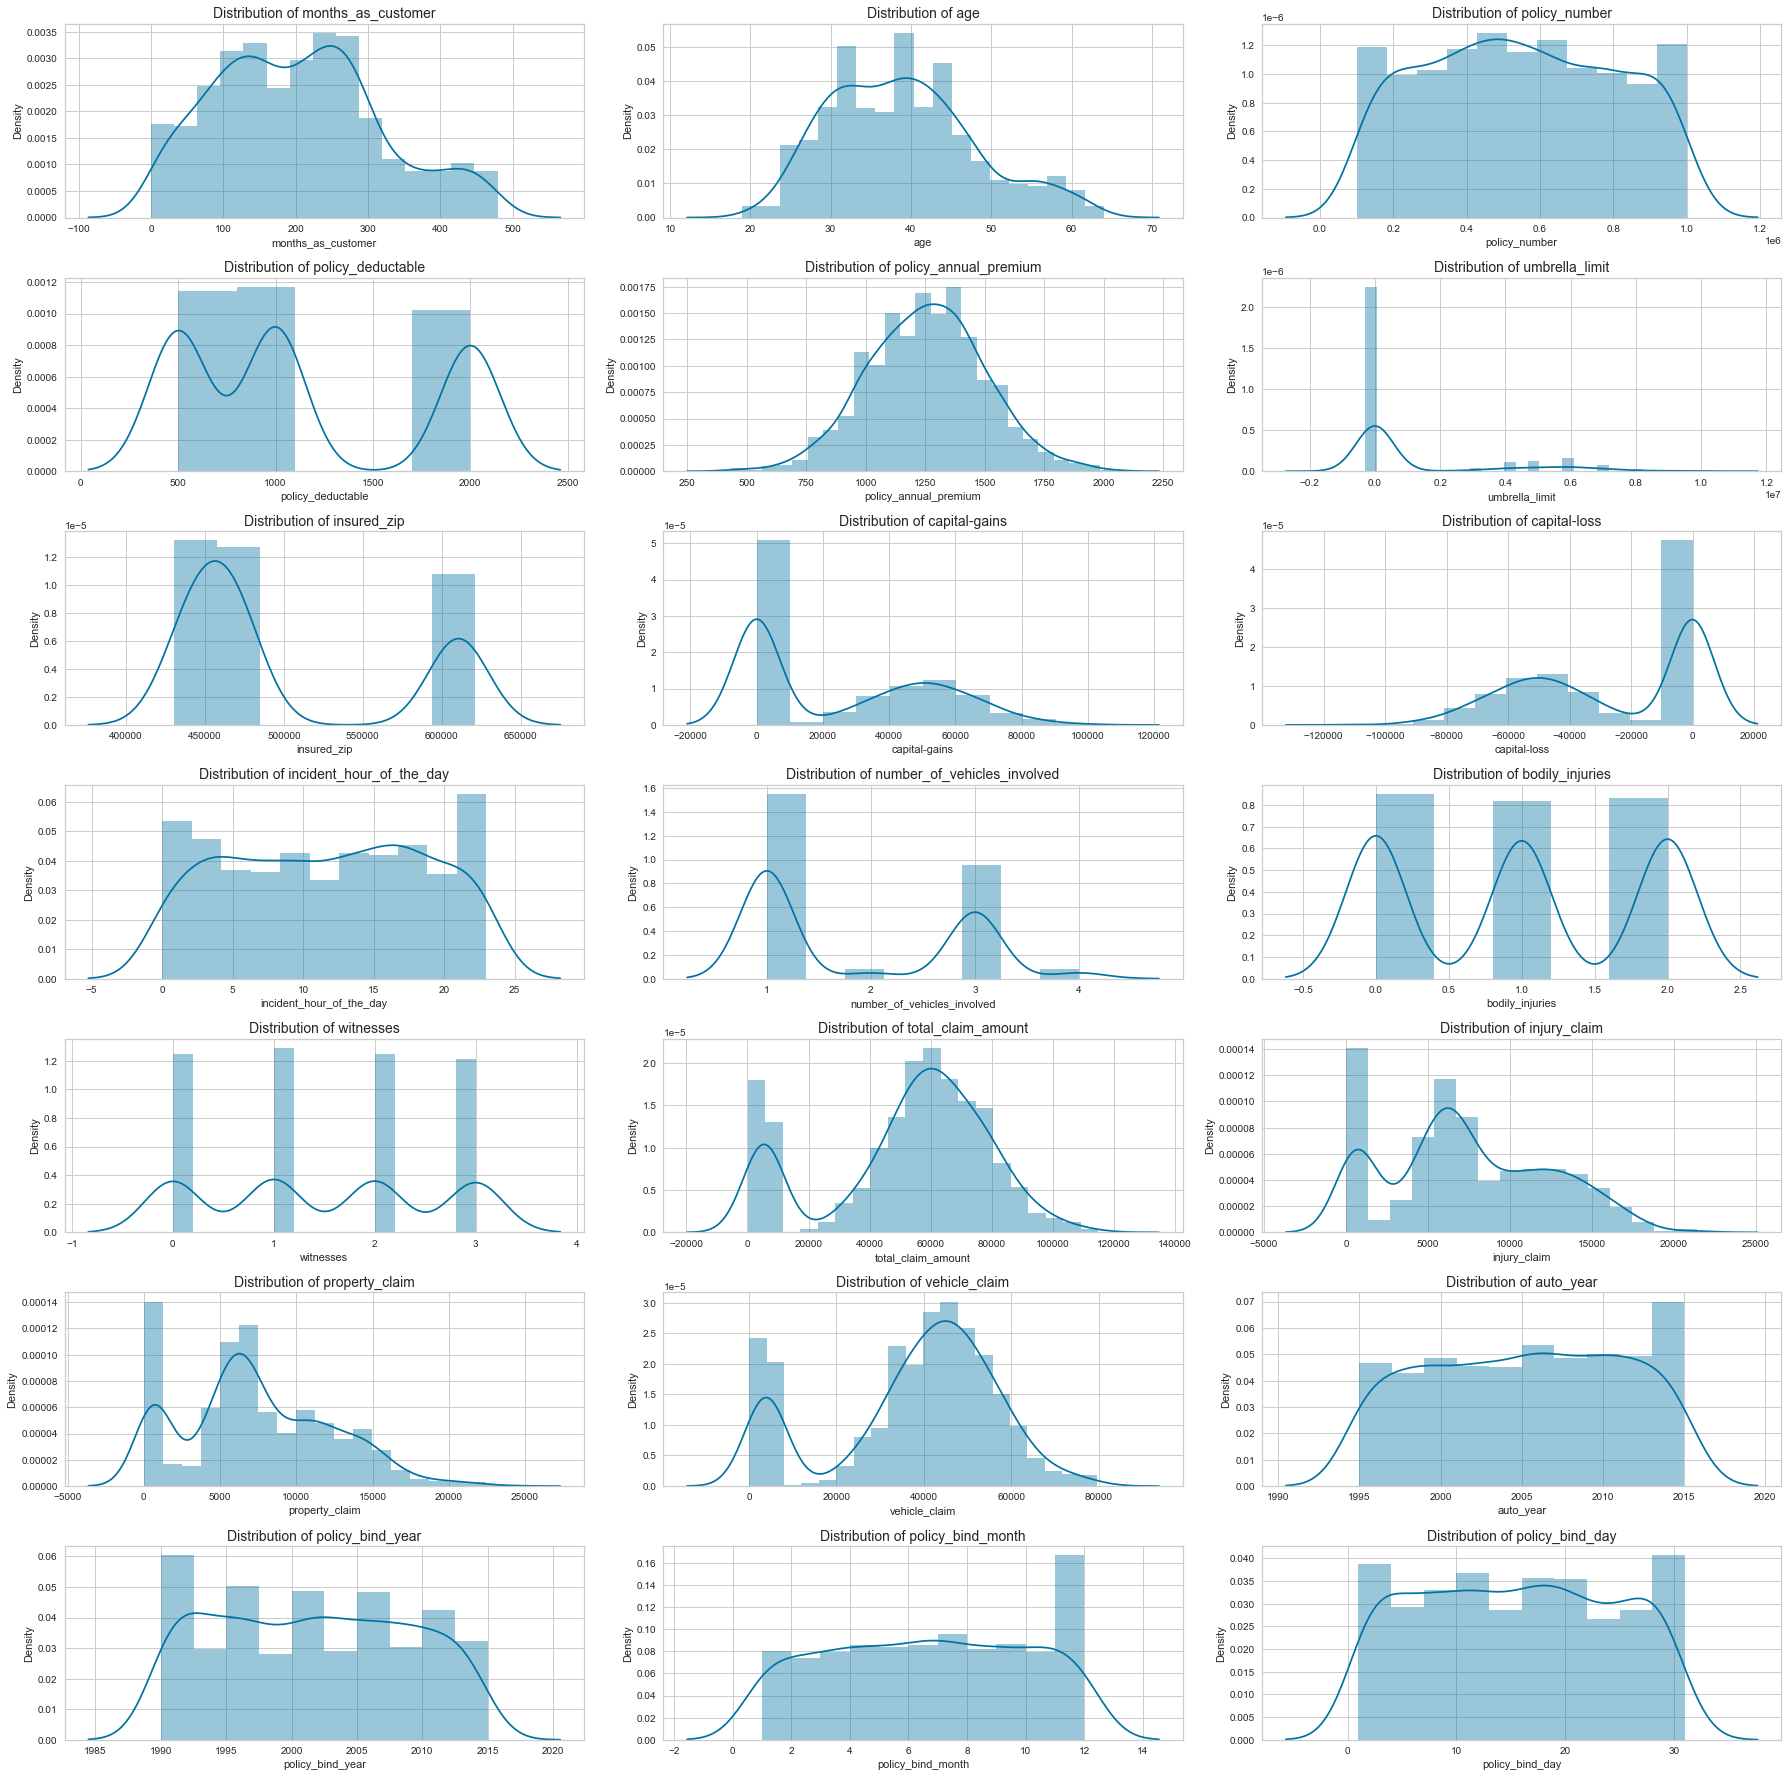

In [21]:
plt.figure(figsize=(25,35))
for i in range(len(col1)):
  plt.subplot(10,3,i+1)
  plt.title(f"Distribution of {col1[i]}",fontsize=14)
  sns.distplot(data[col1[i]])
  plt.tight_layout()

1- From months_As_customers most of the people lies in 0-100 and there are less number of people who lies in b/w 300-500 who are loyal customers.

2-From distribution of age most of the people lies between 30-45 and less people are in between 50-60.

3-From policy_annual_premium it is normally distributed.

4-From policy deductable i can say the value is between 500-1000 and 17000-20000

5-From capital gain 0-10000 has highest peak and with capital loss 0 to -10000 has high peak rest of the distribution are same both features.

6-From total_claim_amount 0-10000 has highest peak and rest of all values are normally distributed.

7-From distribution of property claim most of the people have claimed that 0-1000 values and from 4000-10000 these are 2nd highest people who have claimed for this values and there are very few people who claimed for 20000-25000 values.

8-From distribution of vehicle claim there are many people who claimed for 0-10000 and rest of the value has normal distribution.

# Bivariate analysis

Text(0.5, 1.0, 'Total amount claimed & Vehicle claimed per year')

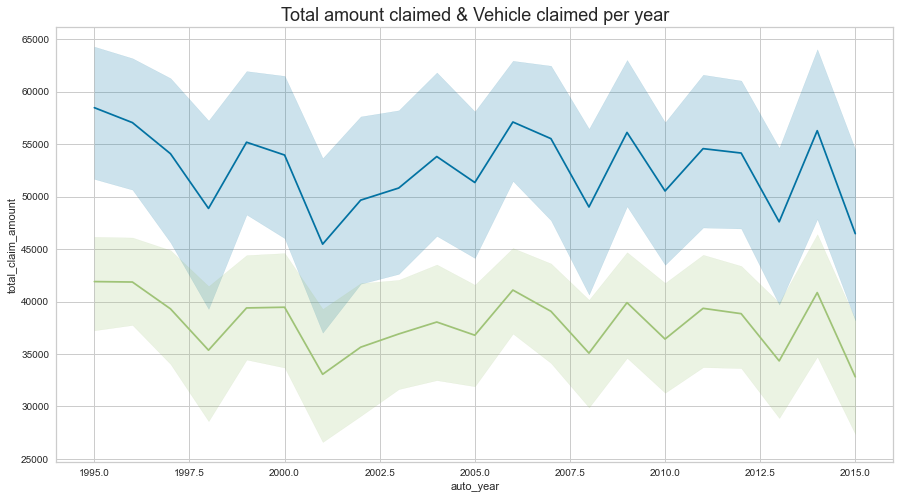

In [23]:
plt.figure(figsize=(15,8))
sns.lineplot(x='auto_year',y='total_claim_amount',data=data)
sns.lineplot(x='auto_year',y='vehicle_claim',data=data)
plt.title("Total amount claimed & Vehicle claimed per year",fontsize=18)

Total amount claimed has high value and vehicle claimed has low count although both have same distribution.

In [24]:
data1=data.select_dtypes(include='object')

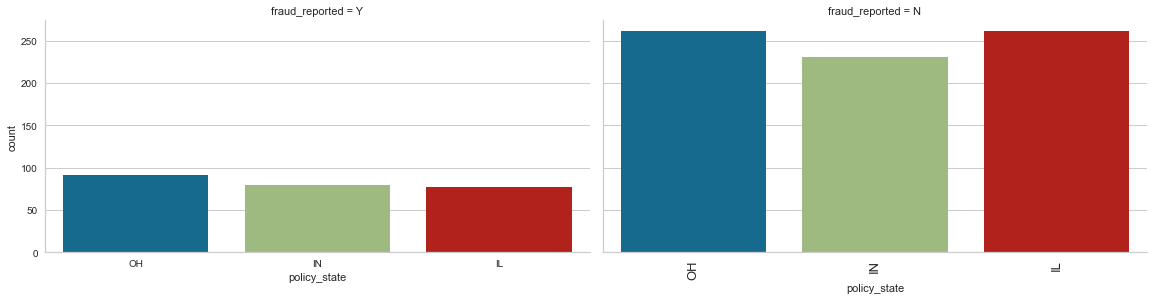

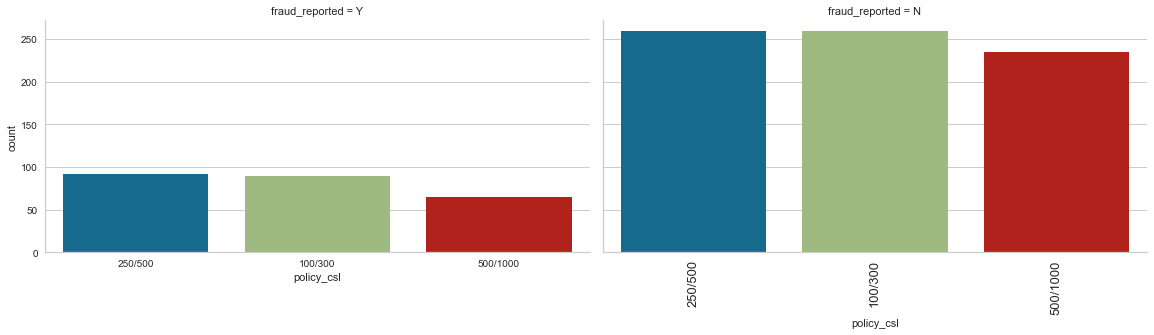

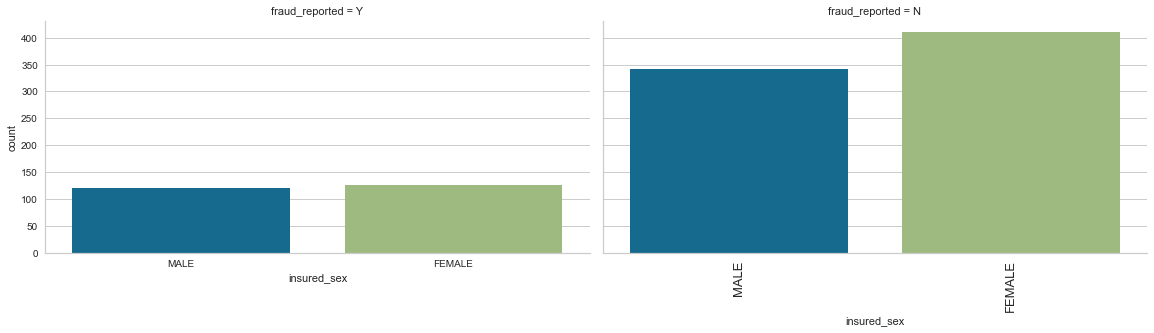

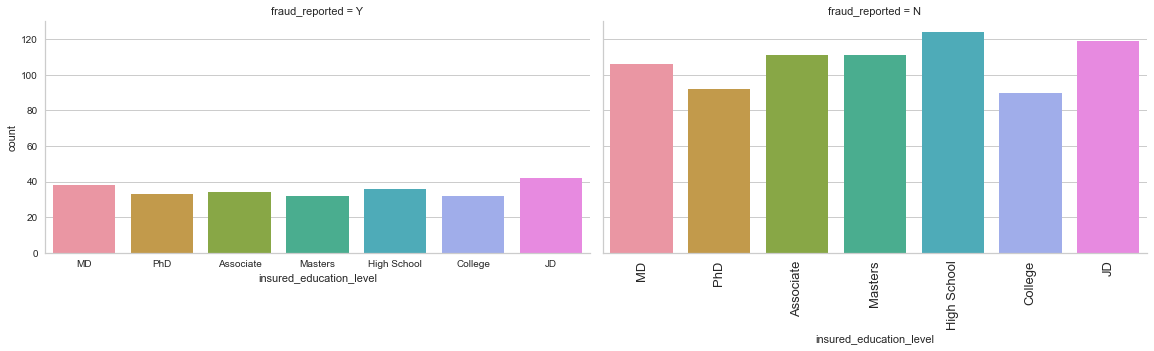

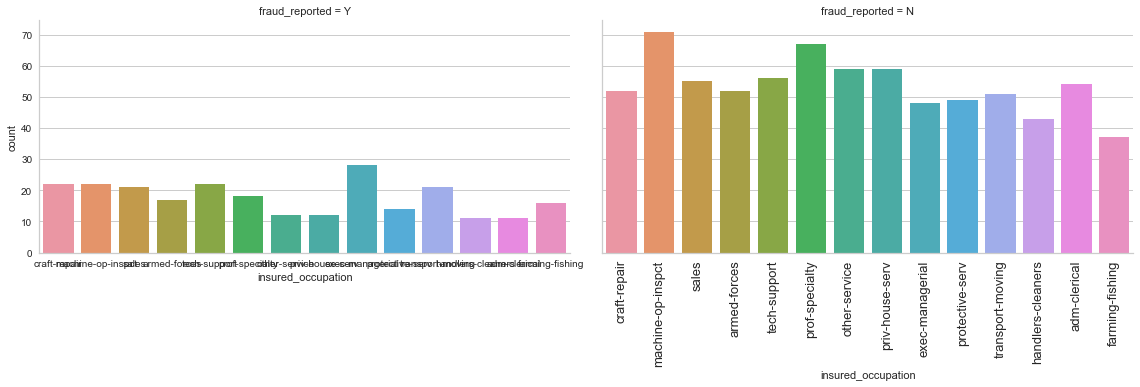

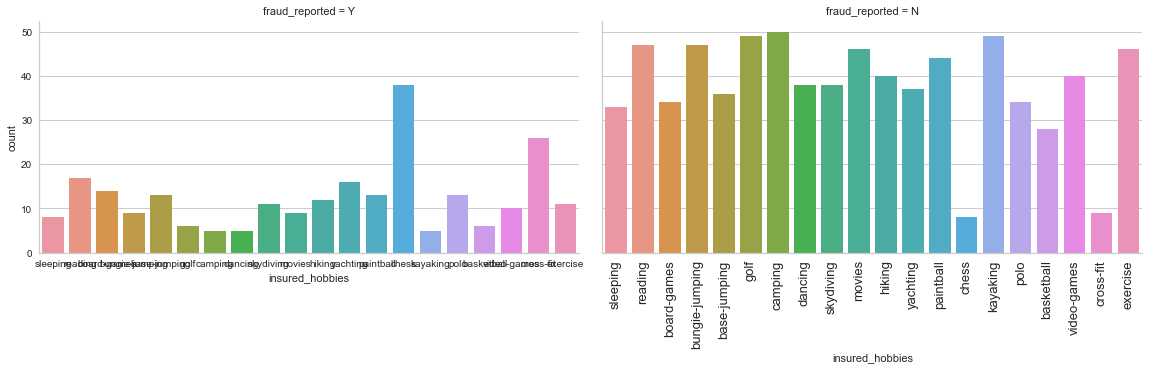

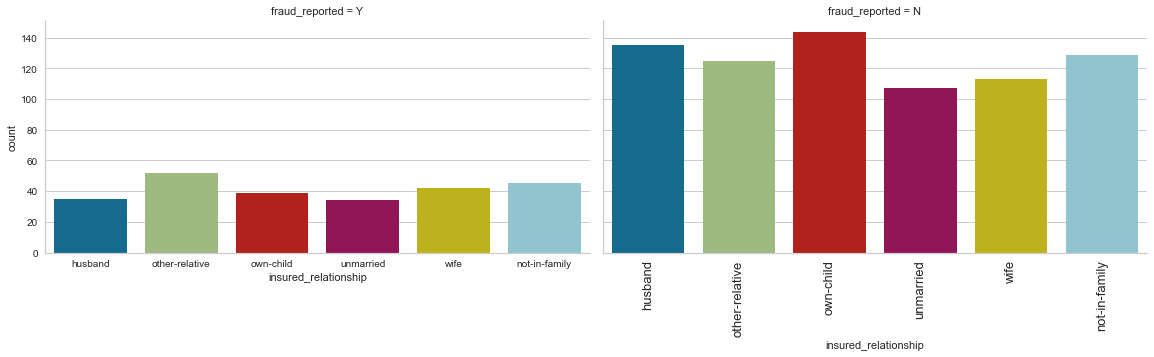

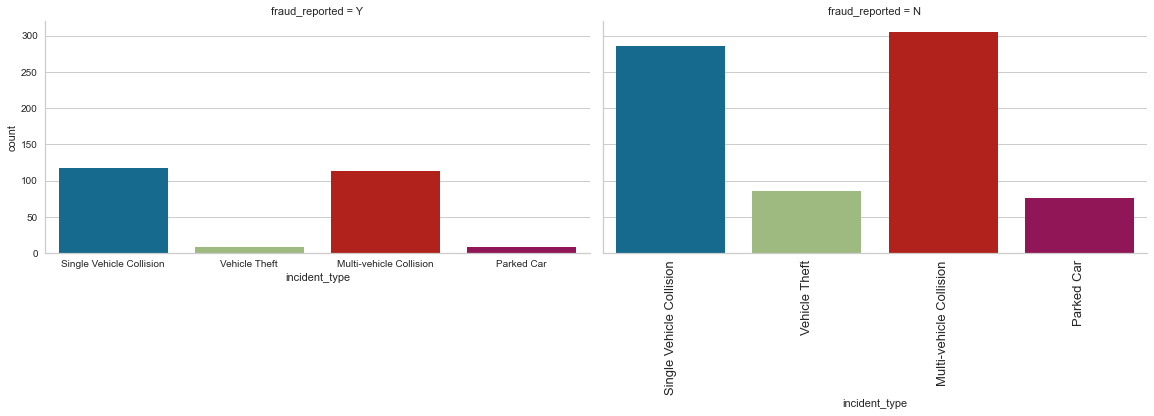

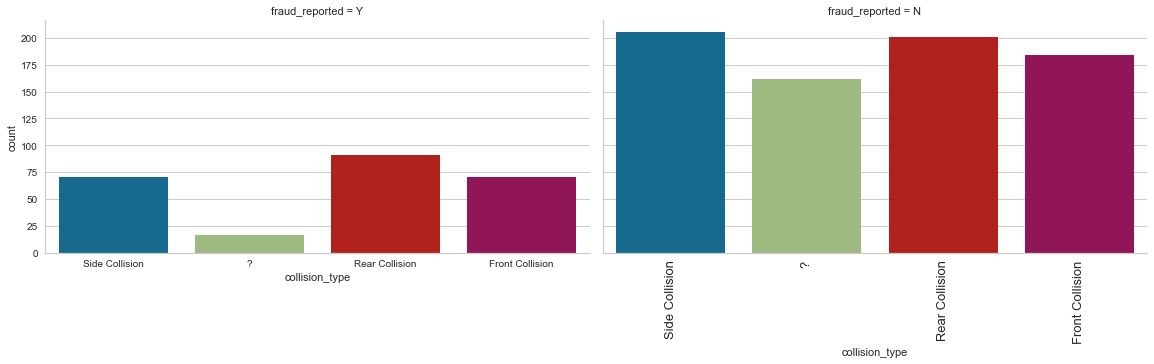

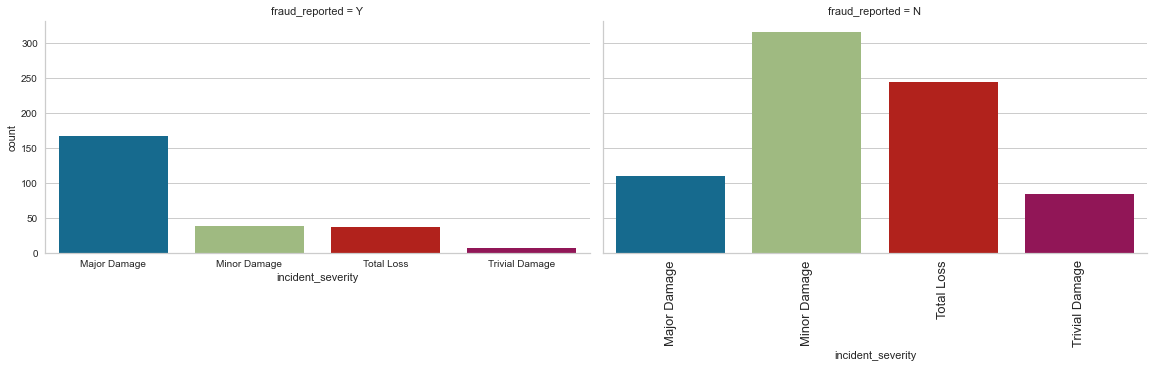

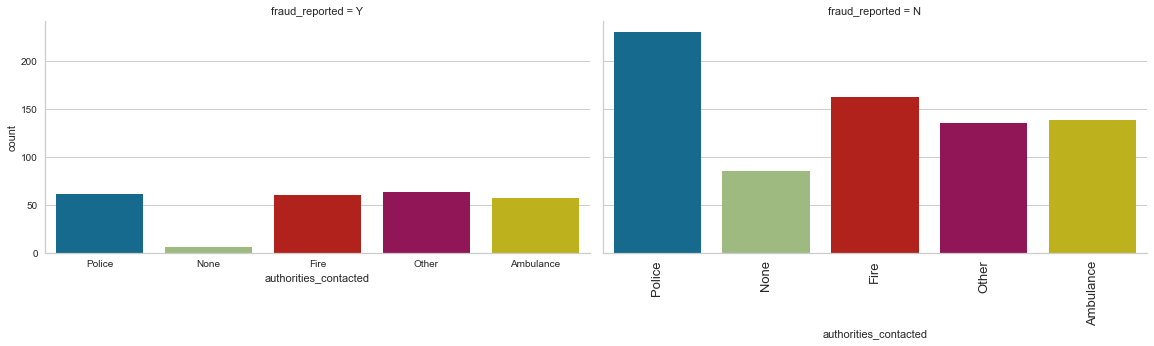

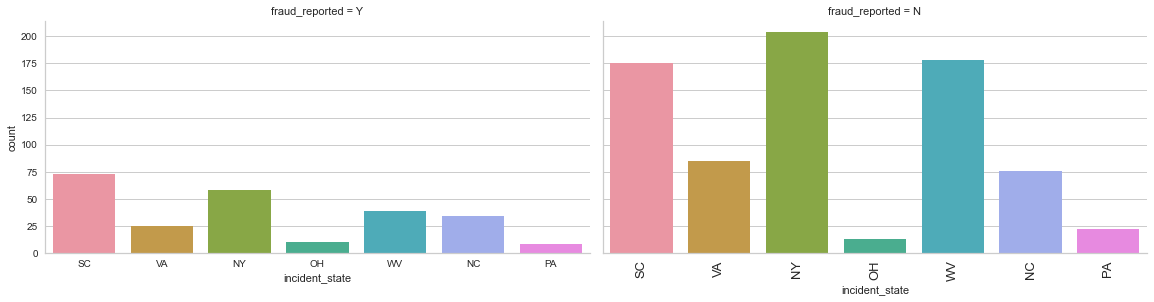

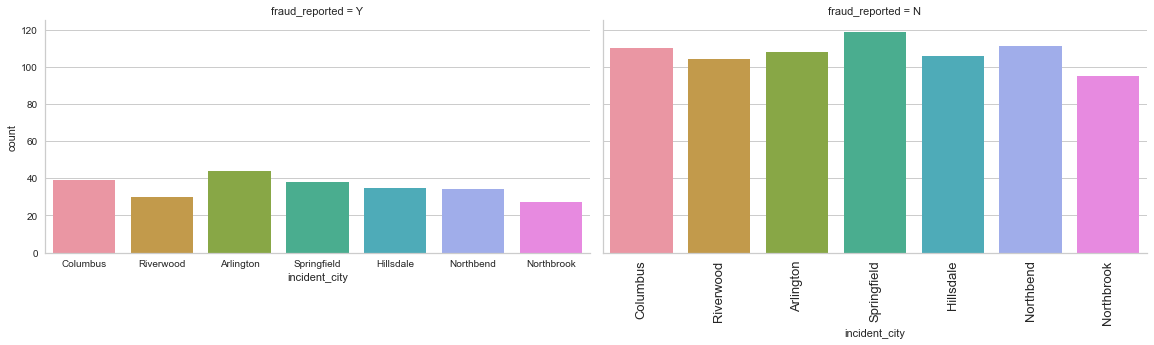

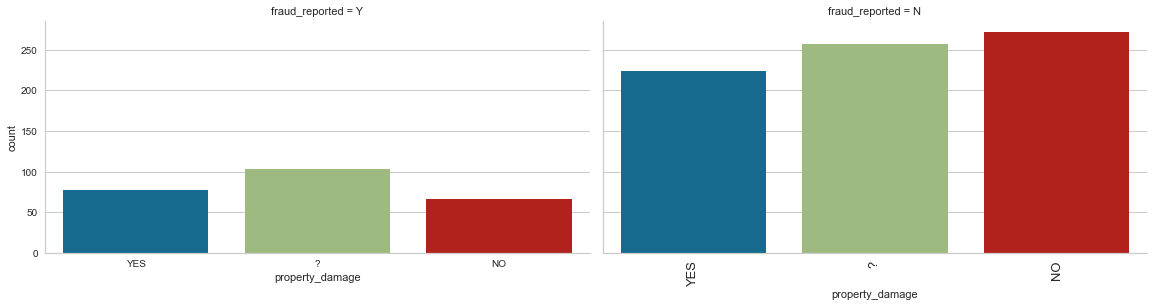

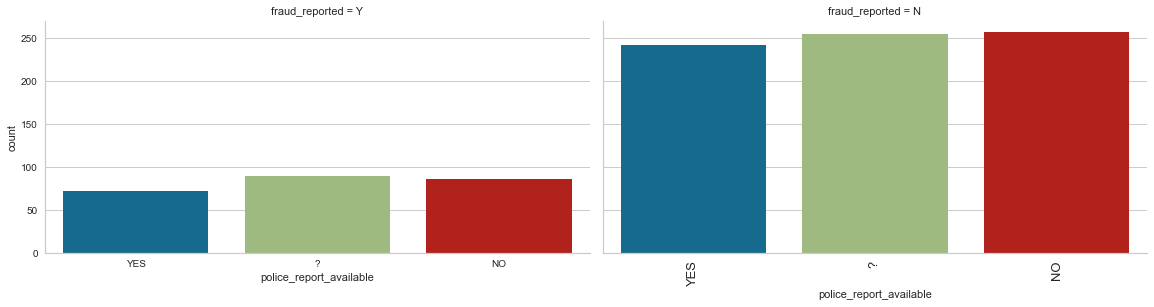

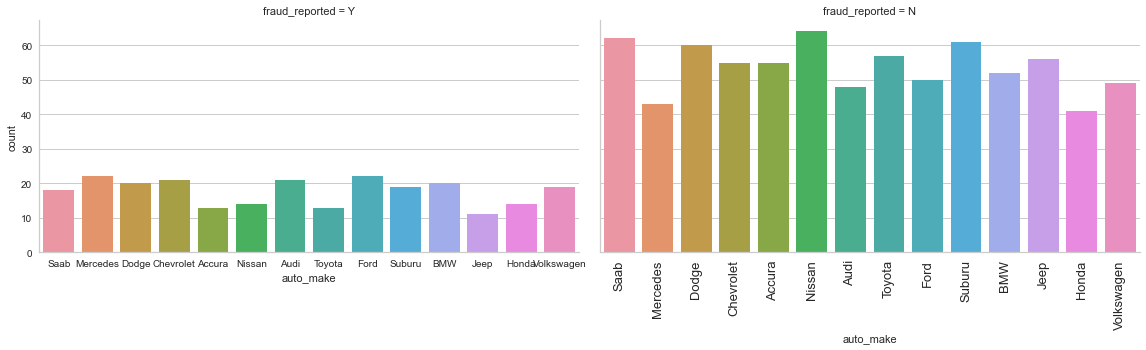

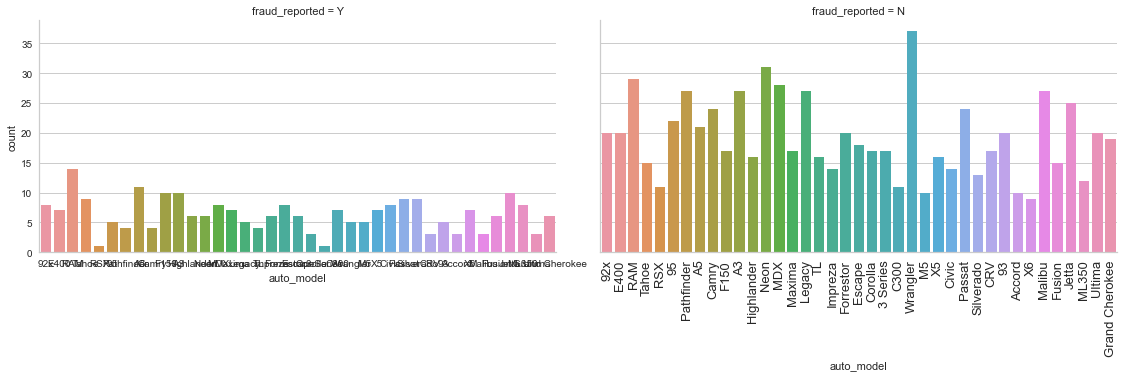

In [25]:
new_data=list(data1.columns)
new_list=new_data
new_data.remove('fraud_reported')
for col in new_list:
  sns.catplot(x=col,col='fraud_reported',data=data1,kind='count',height=4,aspect=2)
  plt.xticks(rotation=90,fontsize=13)

1-People who reported fraud have high value of CH of policy state.

2-People who reported fraud have equal count on both male & female.

3-Mostly People who reported fraud there hobbies are chess.

4-Mostly people who reported fraud mostly have relationship status other-relative.

5-Mostly people who reported fraud have incident_type status single and multi-vehicle collision

6-Mostly people who reported fraud have collision_type status of Rear collision and very less people who claim unknown(?)

7-Mostly People who reported fraud have incident_severity status major damage and very less people who have status trivial damage

8-Mostly People who reported fraud have incident_state SC who claimed more fraud

9-Mostly People who reported fraud have incident_city ARLINGTON who claimed more fraud.

10-Mostly People who reported fraud have property_damage ? followed bye YES.

11-Mostly People who reported fraud have auto_make Mercedes, Ford followed by Audi.

In [26]:
data_no=data.query("fraud_reported=='Y'")

In [27]:
col3=['policy_annual_premium','total_claim_amount','injury_claim','property_claim', 'vehicle_claim']

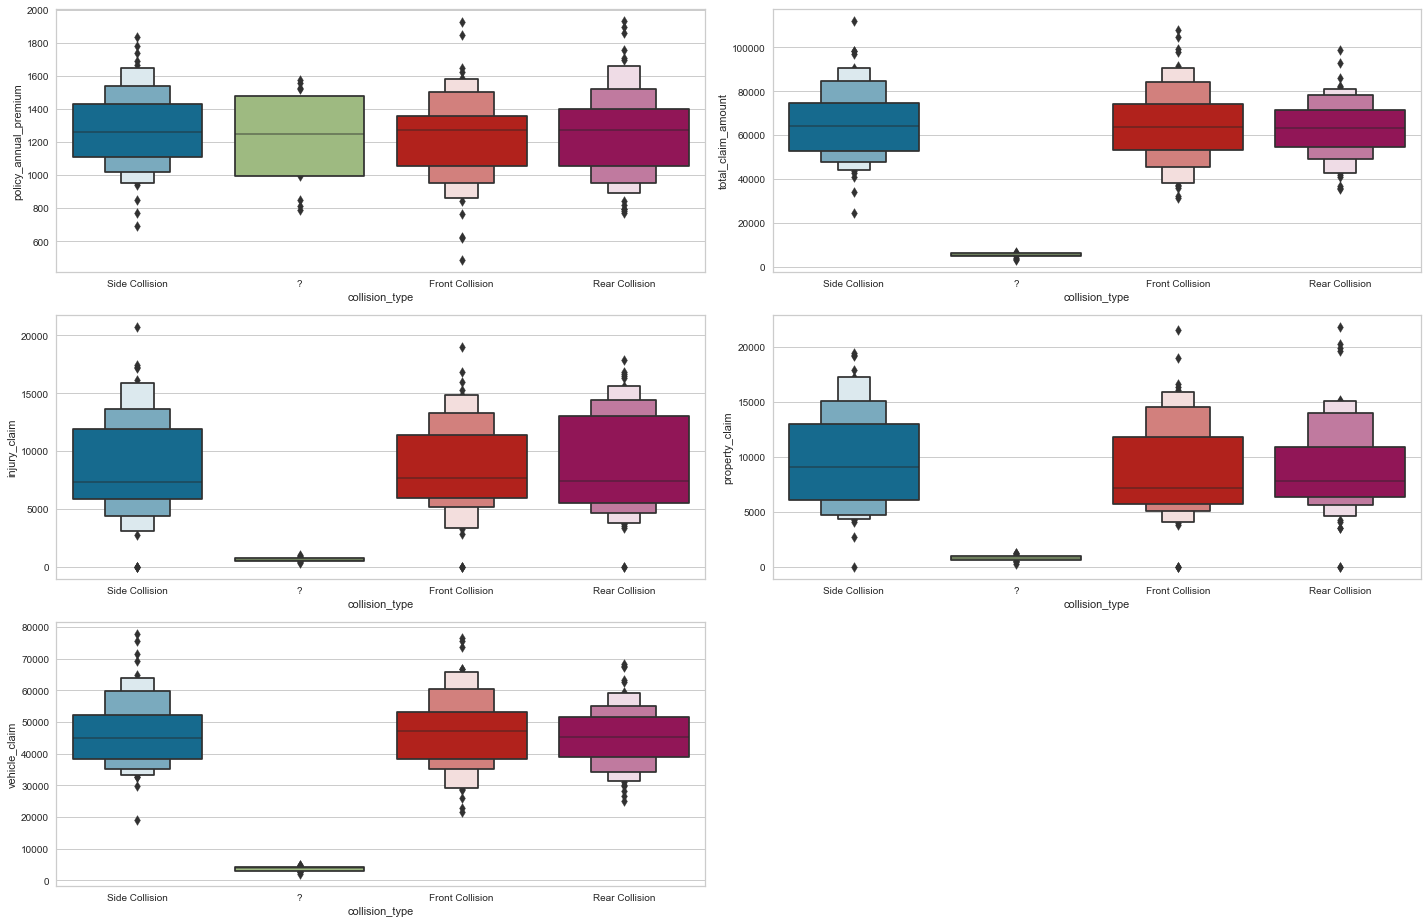

In [28]:
plt.figure(figsize=(20,85))
for i in range(len(col3)):
  plt.subplot(20,2,i+1)
  sns.boxenplot(x=data_no['collision_type'],y=data_no[col3[i]])
  plt.tight_layout()

1-People who have claimed fraud insurance they have policy_annual_premium whoes mean value is betwenn 1300 and max value is approx 1800 and where collision type is ? people mostly have claimed 25% to 75% and for front and collision type people have claimed mostly 25% of the value.

2-From total_claim_amount vs fraud for side and front collision people have claimed maximum of 90000 and for front collision value is around 75000.

3-From injury claim where is fraud is yes Side and rear collision have same max value 15000 and mean value of 700 and for injury claim people have claimed mostly 75% to max value and less people are there who claimed for less then 25%

4-From property_claim who have fraud side collision have 9000 mean value and 17000 max values and front and rear collision almost have approx values and for side collision mostly people have claimed more then 50% of value same with front and real collision most of the people have claimed large value that is greater then 50%.

5-From vehicle claim where fraud is rear and side have almost same mean value and front side have a different value.

6-From the values that is mentioned above that means people have claimed these much of money from company in name of fraud means value represent the average value that people have claimed and max value represent the value that the maximum money that people have claimed in name of fraud.

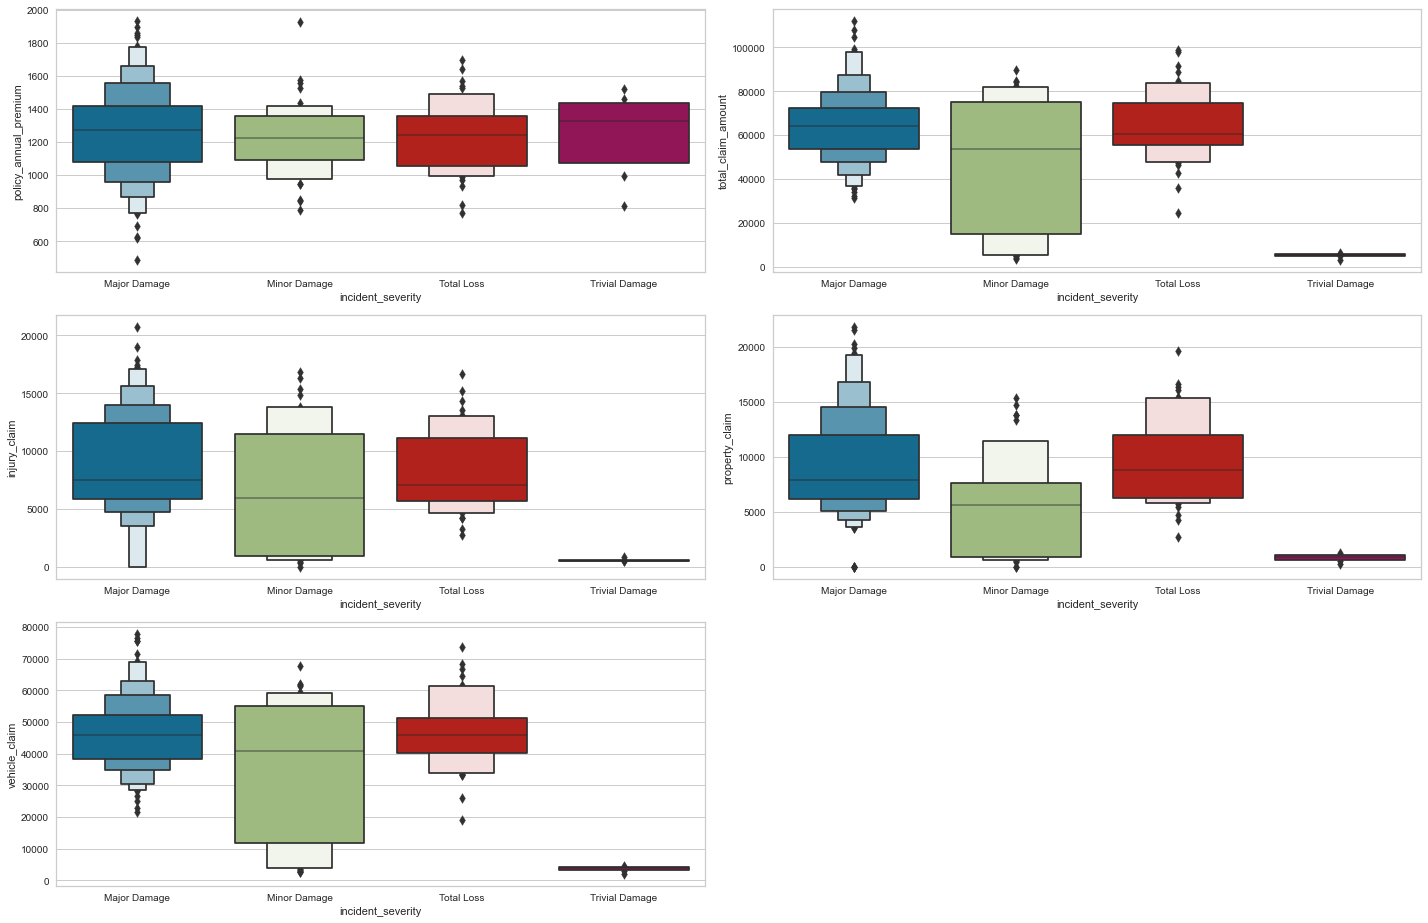

In [29]:
plt.figure(figsize=(20,85))
for i in range(len(col3)):
  plt.subplot(20,2,i+1)
  sns.boxenplot(x=data_no['incident_severity'],y=data_no[col3[i]])
  plt.tight_layout()

1-From policy annual premium minor damage most of the people have claimed value between 25-75%. Also, there are some outliers who have claimed for minimum and maximum values & for trivial damage most of the people have claimed for the value that is less than average.

2-From total claim amount for minor damage mostly people have value that is less then average.

3-From injury claim for major damage people have claimed more than the mean and for major damage most of the people have claimed 25% or 75% of value and for total loss most of the people have claimed more than mean value.

4-From property claim for major damage the most of the value lies above mean means for major damage and people get more money & for minor damage people get most of the  value that is less than mean or average.

5-From vehicle claim for minor damage maximum people get money that is less then mean less no. of people get money that is greater then mean value.

In [30]:
col4=['total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

(array([1992.5, 1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. ,
        2012.5, 2015. , 2017.5]),
 [Text(0, 1992.5, '1992.5'),
  Text(0, 1995.0, '1995.0'),
  Text(0, 1997.5, '1997.5'),
  Text(0, 2000.0, '2000.0'),
  Text(0, 2002.5, '2002.5'),
  Text(0, 2005.0, '2005.0'),
  Text(0, 2007.5, '2007.5'),
  Text(0, 2010.0, '2010.0'),
  Text(0, 2012.5, '2012.5'),
  Text(0, 2015.0, '2015.0'),
  Text(0, 2017.5, '2017.5')])

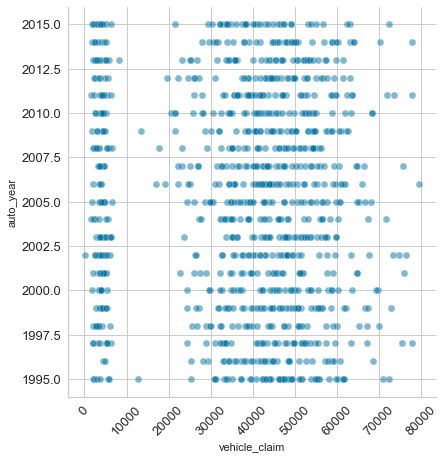

In [31]:
sns.relplot(y='auto_year',x='vehicle_claim',data=data,alpha=.5,palette='muted',sizes=(40,400),height=6)
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)

 Vehicle claim value is not proportional to year, it remains same by the years increasing. 

(array([1992.5, 1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. ,
        2012.5, 2015. , 2017.5]),
 [Text(0, 1992.5, '1992.5'),
  Text(0, 1995.0, '1995.0'),
  Text(0, 1997.5, '1997.5'),
  Text(0, 2000.0, '2000.0'),
  Text(0, 2002.5, '2002.5'),
  Text(0, 2005.0, '2005.0'),
  Text(0, 2007.5, '2007.5'),
  Text(0, 2010.0, '2010.0'),
  Text(0, 2012.5, '2012.5'),
  Text(0, 2015.0, '2015.0'),
  Text(0, 2017.5, '2017.5')])

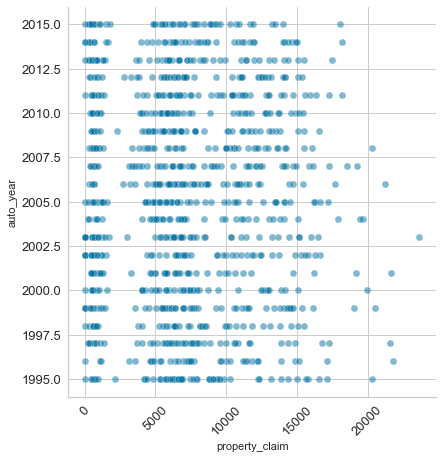

In [32]:
sns.relplot(y='auto_year',x='property_claim',data=data,alpha=.5,palette='muted',sizes=(40,400),height=6)
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)

Property claim value is not proportional to year, it remains same by the years increasing

(array([1992.5, 1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. ,
        2012.5, 2015. , 2017.5]),
 [Text(0, 1992.5, '1992.5'),
  Text(0, 1995.0, '1995.0'),
  Text(0, 1997.5, '1997.5'),
  Text(0, 2000.0, '2000.0'),
  Text(0, 2002.5, '2002.5'),
  Text(0, 2005.0, '2005.0'),
  Text(0, 2007.5, '2007.5'),
  Text(0, 2010.0, '2010.0'),
  Text(0, 2012.5, '2012.5'),
  Text(0, 2015.0, '2015.0'),
  Text(0, 2017.5, '2017.5')])

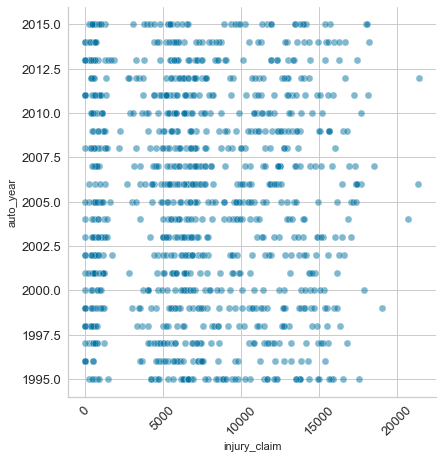

In [33]:
sns.relplot(y='auto_year',x='injury_claim',data=data,alpha=.5,palette='muted',sizes=(40,400),height=6)
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)

Injury claim value is not proportional to year, it  almost remains same by the years increasing

(array([1992.5, 1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. ,
        2012.5, 2015. , 2017.5]),
 [Text(0, 1992.5, '1992.5'),
  Text(0, 1995.0, '1995.0'),
  Text(0, 1997.5, '1997.5'),
  Text(0, 2000.0, '2000.0'),
  Text(0, 2002.5, '2002.5'),
  Text(0, 2005.0, '2005.0'),
  Text(0, 2007.5, '2007.5'),
  Text(0, 2010.0, '2010.0'),
  Text(0, 2012.5, '2012.5'),
  Text(0, 2015.0, '2015.0'),
  Text(0, 2017.5, '2017.5')])

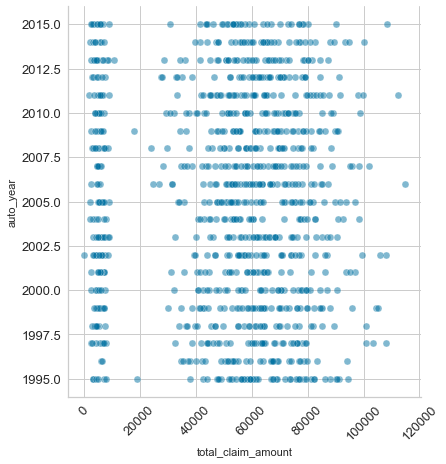

In [35]:
sns.relplot(y='auto_year',x='total_claim_amount',data=data,alpha=.5,palette='muted',sizes=(40,400),height=6)
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)

total claim amount value is almost same as the year increasing.

In [36]:
oe=OrdinalEncoder()
def ordinal_transform(df,col):
  df[col]=oe.fit_transform(df[col])
  return df

In [37]:
data=ordinal_transform(data,['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level','insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type','collision_type', 'incident_severity','authorities_contacted', 'incident_state', 'incident_city','property_damage', 'police_report_available','auto_make','auto_model', 'fraud_reported'])

In [38]:
def preprocess2(df):
  df=df.copy()

  X=data.drop(['fraud_reported'],axis=1)
  y=data['fraud_reported']
  return X,y

In [39]:
X,y=preprocess2(data)

x=X

### Checking correlation

<AxesSubplot:>

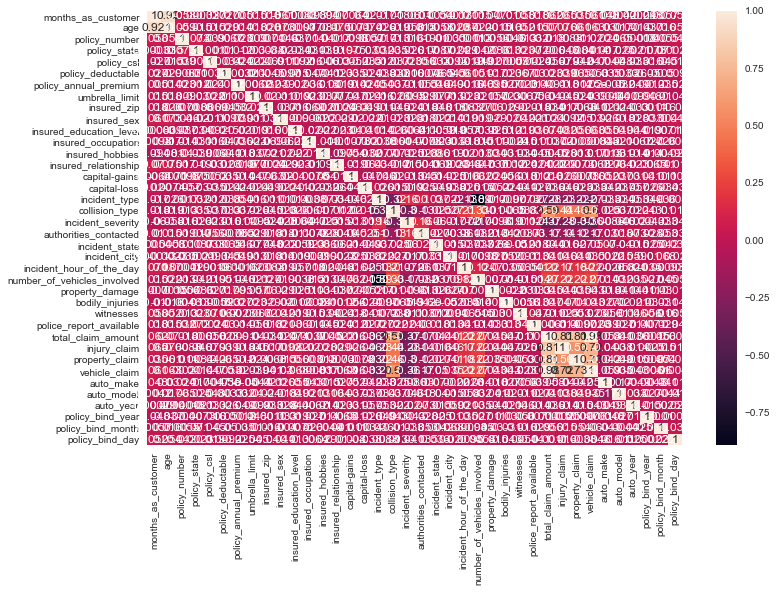

In [40]:
X_corr=X.corr()
plt.figure(figsize=(12,8))
sns.heatmap(X_corr,annot=True)

From above heatmap months as customer and age are having correlation more then 90% while rest of all features are having good correlation.

Should drop month as customer.

In [41]:
X.drop(['months_as_customer'],axis=1,inplace=True)

In [42]:
X.dtypes

age                              int64
policy_number                    int64
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                float64
bodily_injuries                  int64
witnesses                

# Outliers

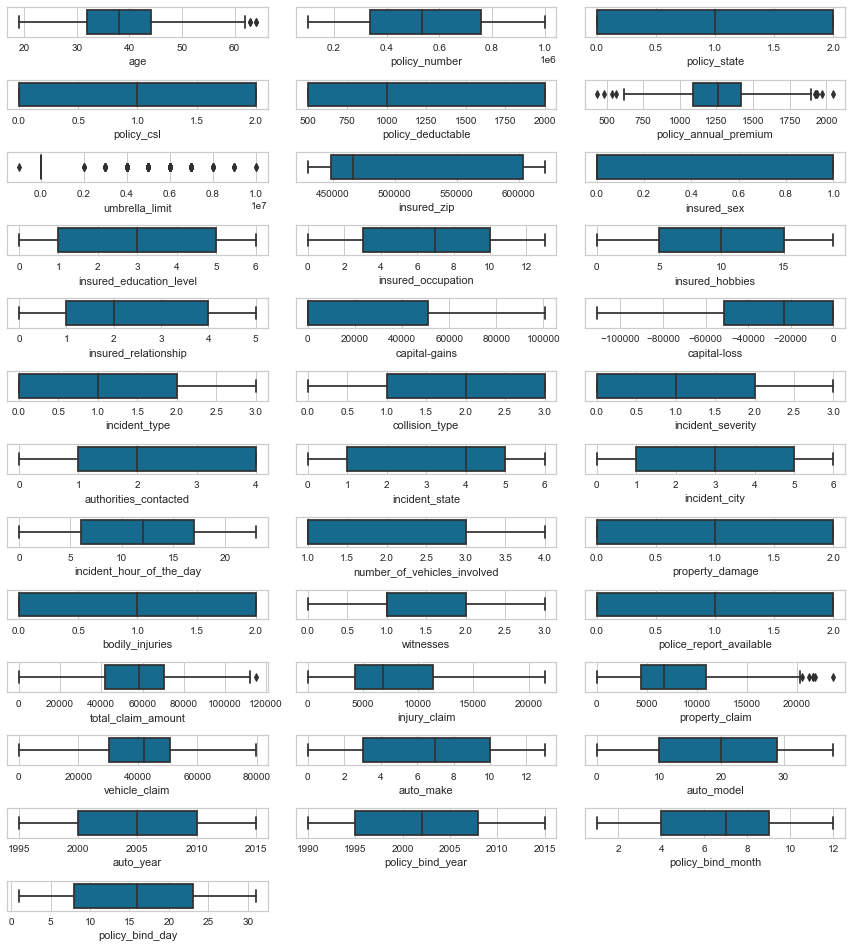

In [43]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(20,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

OUTLIERS SHOULD BE REMOVED

In [44]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<=percentile[0]]=percentile[0]
  X[col][X[col]>=percentile[1]]=percentile[1]

### AFTER REMOVING OUTLIERS

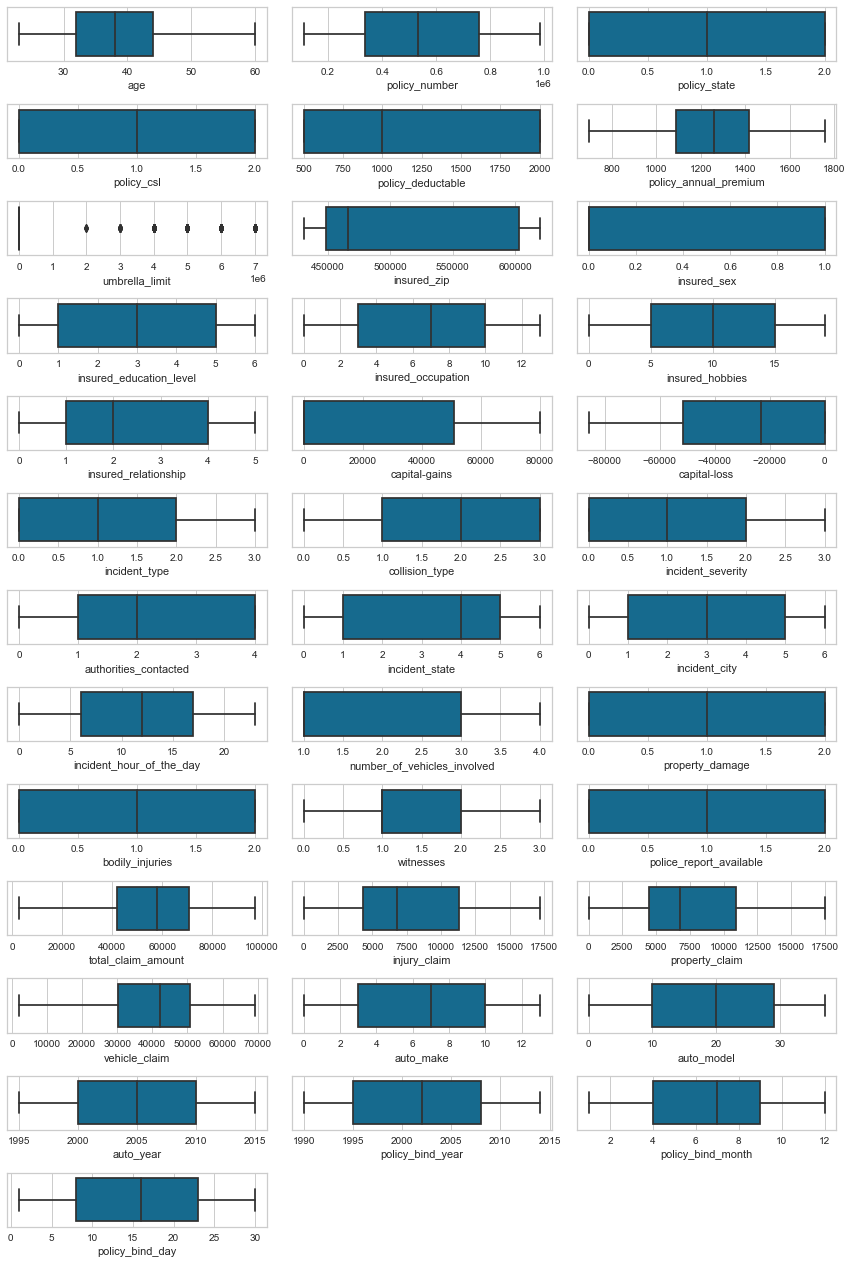

In [45]:
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(15,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

# DATA BALANCING

In [47]:
def balancing_data(X,y):
  x=X
  smote=SMOTE(random_state=42)
  X_res,y_res=smote.fit_resample(X,y)
  X_new=pd.DataFrame(X_res,columns=x.columns)
  y_new=pd.DataFrame(y_res,columns=['fraud_reported'])
  return X_new,y_new

In [48]:
X_new,y_new=balancing_data(X,y)

### CHECKING BALANCED DATA

Text(0.5, 1.0, 'Balanced data')

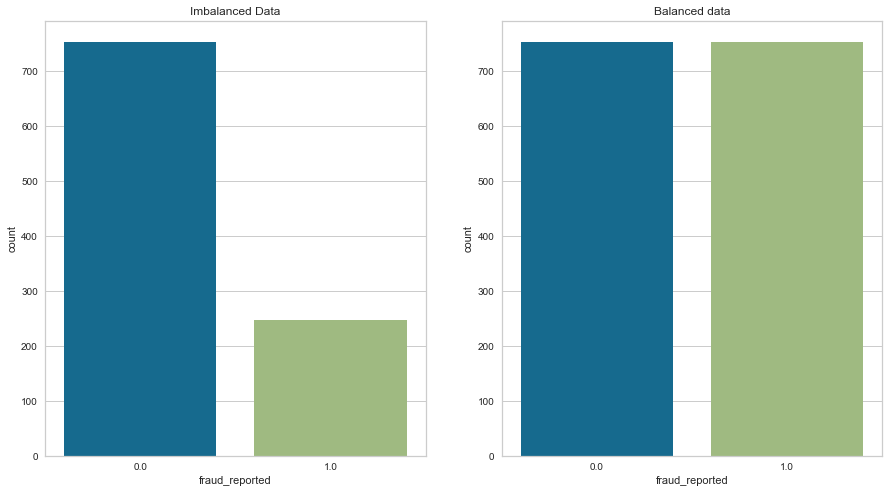

In [51]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(data['fraud_reported'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['fraud_reported'])
plt.title("Balanced data")

# Skewness

In [52]:
X.skew()

age                            0.461109
policy_number                  0.036105
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium         -0.046551
umbrella_limit                 1.712094
insured_zip                    0.816445
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.437885
capital-loss                  -0.366324
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777


# Splitting X AND Y

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

# MODELS

In [54]:
models={
    "Logistic Regression":LogisticRegression(),
    "DecisionTree Classifier":DecisionTreeClassifier(),
    "ExtraTrees Classifier":ExtraTreesClassifier(),
    "RandomForest Classifier":RandomForestClassifier(),
    "XGB Classifier":XGBClassifier(),
    "LGBM Classifier":LGBMClassifier()
}



Accuracy_Score 0.5685840707964602


SCORE 0.5685840707964602


Confusion metrics


[[125  91]
 [104 132]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.55      0.58      0.56       216
         1.0       0.59      0.56      0.58       236

    accuracy                           0.57       452
   macro avg       0.57      0.57      0.57       452
weighted avg       0.57      0.57      0.57       452

Cross_Val_Score 0.5650810763239533


ROC AUC CURVE


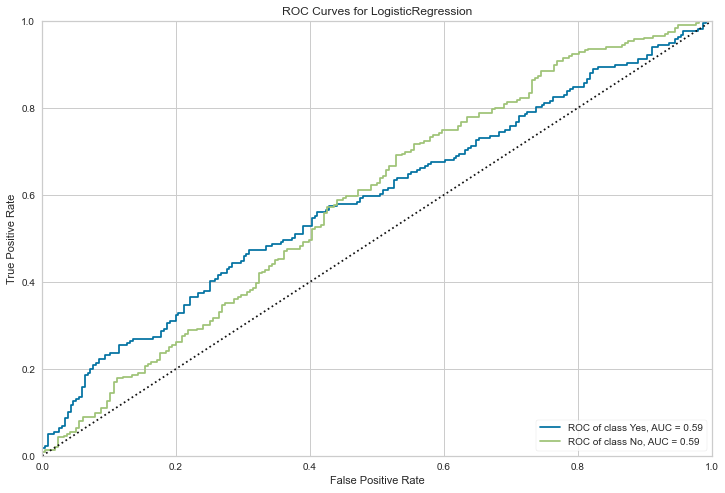

MODEL LEARNING CURVE


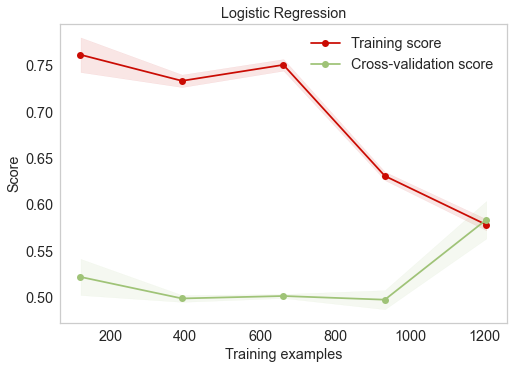



Accuracy_Score 0.8008849557522124


SCORE 0.8008849557522124


Confusion metrics


[[168  48]
 [ 42 194]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       216
         1.0       0.80      0.82      0.81       236

    accuracy                           0.80       452
   macro avg       0.80      0.80      0.80       452
weighted avg       0.80      0.80      0.80       452

Cross_Val_Score 0.8426173241512839


ROC AUC CURVE


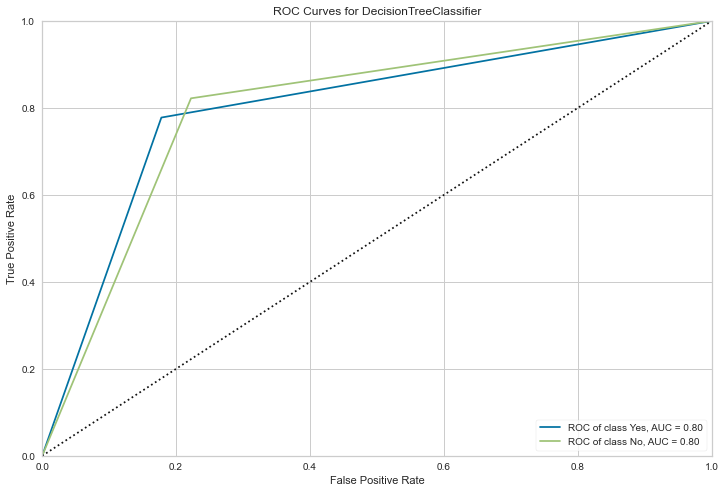

MODEL LEARNING CURVE


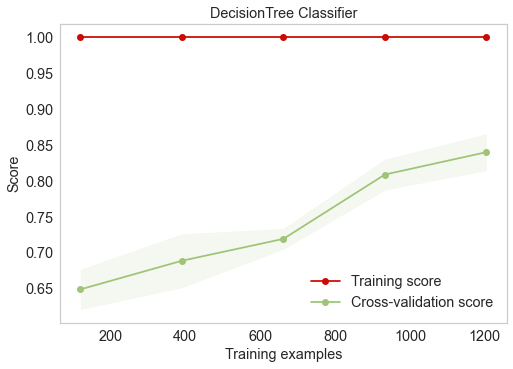



Accuracy_Score 0.8915929203539823


SCORE 0.8915929203539823


Confusion metrics


[[191  25]
 [ 24 212]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89       216
         1.0       0.89      0.90      0.90       236

    accuracy                           0.89       452
   macro avg       0.89      0.89      0.89       452
weighted avg       0.89      0.89      0.89       452

Cross_Val_Score 0.8877758465160281


ROC AUC CURVE


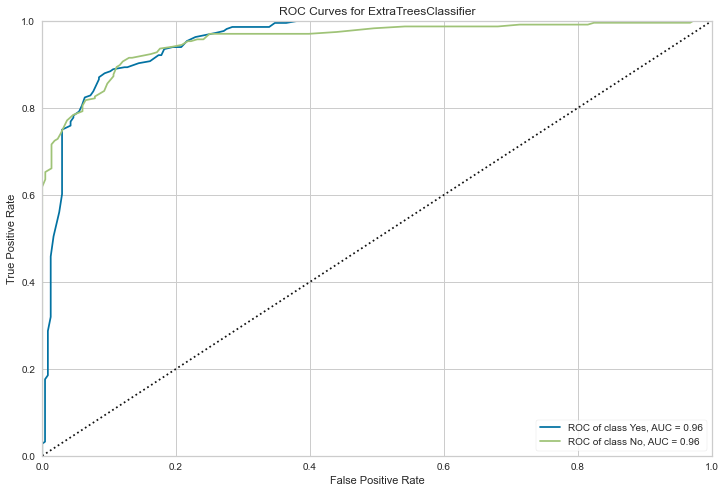

MODEL LEARNING CURVE


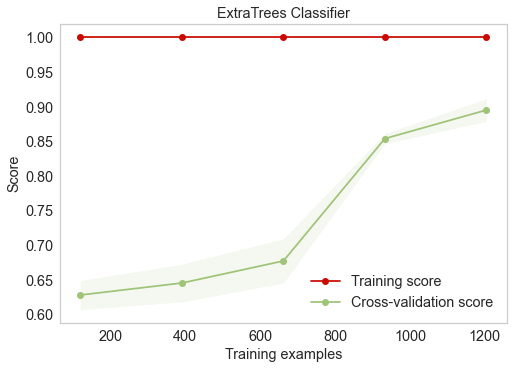



Accuracy_Score 0.8628318584070797


SCORE 0.8628318584070797


Confusion metrics


[[186  30]
 [ 32 204]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       216
         1.0       0.87      0.86      0.87       236

    accuracy                           0.86       452
   macro avg       0.86      0.86      0.86       452
weighted avg       0.86      0.86      0.86       452

Cross_Val_Score 0.8725066555191304


ROC AUC CURVE


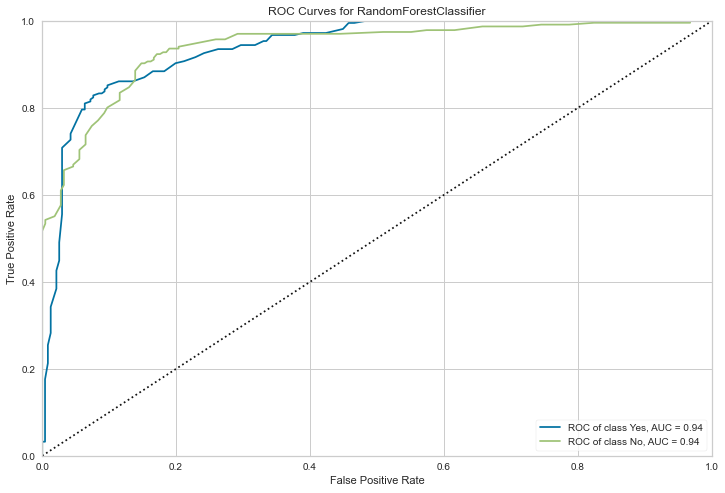

MODEL LEARNING CURVE


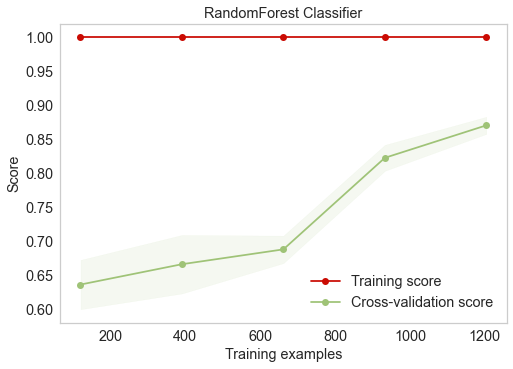

[02:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy_Score 0.8716814159292036


SCORE 0.8716814159292036


Confusion metrics


[[180  36]
 [ 22 214]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       216
         1.0       0.86      0.91      0.88       236

    accuracy                           0.87       452
   macro avg       0.87      0.87      0.87       452
weighted avg       0.87      0.87      0.87       452

[02:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'l

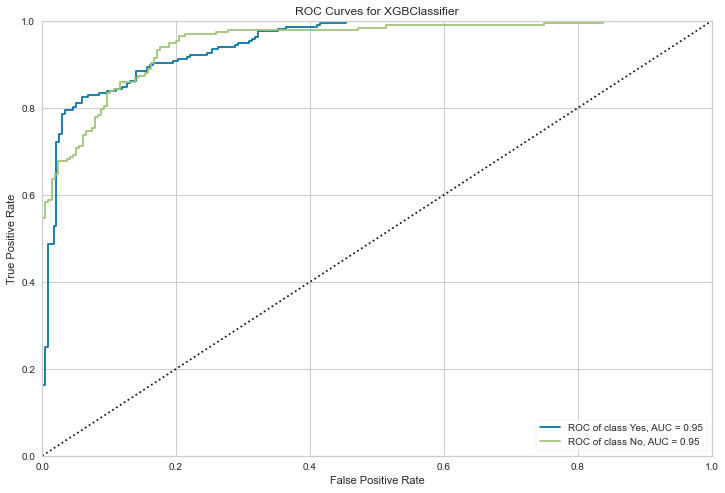

MODEL LEARNING CURVE
[02:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:53:43] WARNING: C:/Users/Administrator/worksp

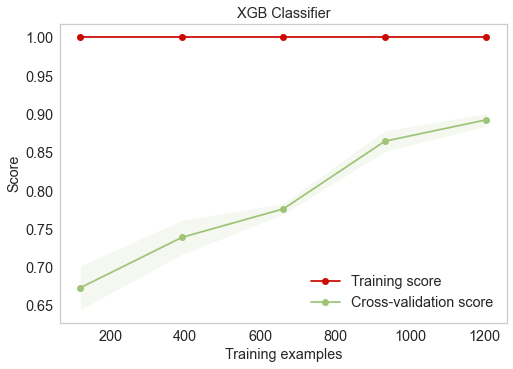



Accuracy_Score 0.8805309734513275


SCORE 0.8805309734513275


Confusion metrics


[[183  33]
 [ 21 215]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87       216
         1.0       0.87      0.91      0.89       236

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452

Cross_Val_Score 0.8857890915491409


ROC AUC CURVE


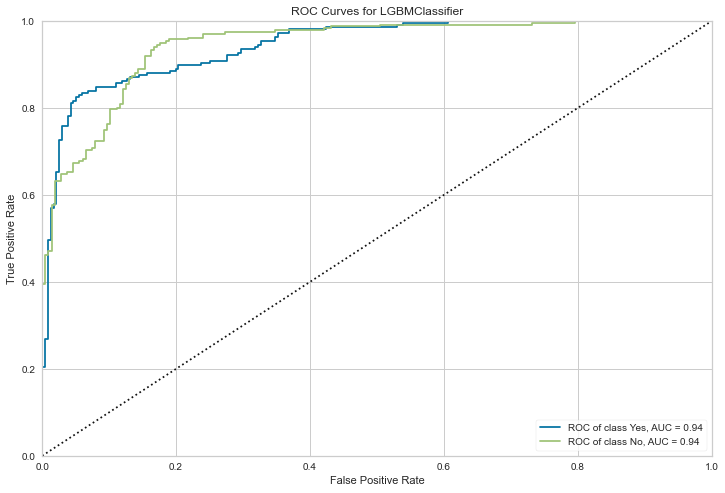

MODEL LEARNING CURVE


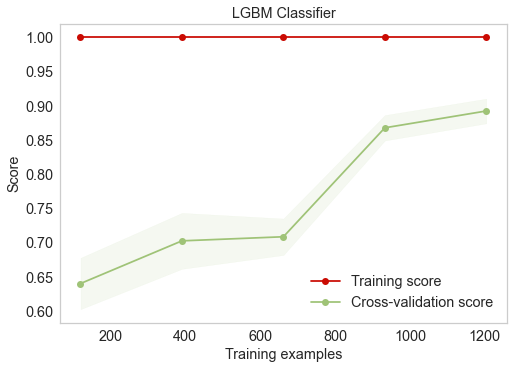

In [56]:
skf=StratifiedKFold(n_splits=5,shuffle=True)
Score=[]
CVS=[]
MODEL=[]
for name,model in models.items():
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n')
  ac=accuracy_score(y_test,y_pred)
  Score.append(ac)
  print("Accuracy_Score",ac)
  print('\n')
  print("SCORE",model.score(X_test,y_test))
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  print('Confusion metrics')
  print('\n')
  print(cm)
  print("CLASSIFICATION REPORT")
  report=classification_report(y_test,y_pred)
  print('\n')
  print(report)
  csv=cross_val_score(model,X_new,y_new,cv=skf).mean()
  CVS.append(csv*100)
  print("Cross_Val_Score",csv)
  print('\n')
  print("ROC AUC CURVE")
  plt.figure(figsize=(12,8))
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['Yes','No'],micro=False,macro=False)
  print("MODEL LEARNING CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
  plt.show()

XGB IS GIVING GOOD ACCURACY.

In [57]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)

[03:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
XGB.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

# Hyperparameter tuning

In [59]:
params={
 'booster':['gbtree','dart'],
 'gamma': [0,1,2,3],
 'importance_type': ['gain','split'],
 'max_depth': [6,5,7],
 'n_estimators': [100,200,500],
}

In [60]:
Grid=GridSearchCV(estimator=XGB,param_grid=params,n_jobs=-1,cv=skf,scoring='accuracy')

In [61]:
Grid.fit(X_new,y_new)

[03:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monoton...)',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_me

In [62]:
Grid.best_params_

{'booster': 'gbtree',
 'gamma': 3,
 'importance_type': 'gain',
 'max_depth': 7,
 'n_estimators': 100}

In [63]:
Grid.best_score_

0.8971045741567842

Accuracy increased from 88.27 to 89.7

In [65]:
Xgb=XGBClassifier(booster= 'gbtree',
 gamma= 1,
 importance_type= 'gain',
 max_depth= 6,
 n_estimators= 100)

In [66]:
Xgb.fit(X_train,y_train)

[03:41:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

ROC AUC CURVE


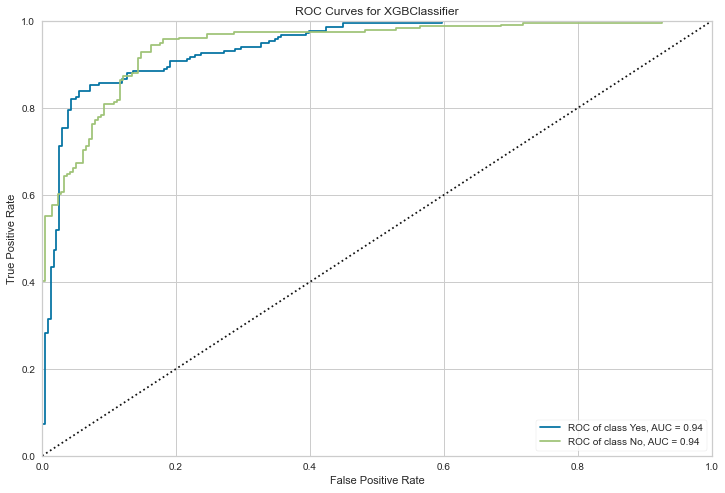

MODEL LEARNING CURVE
[03:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:41:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:41:54] WARNING: C:/Users/Administrator/worksp

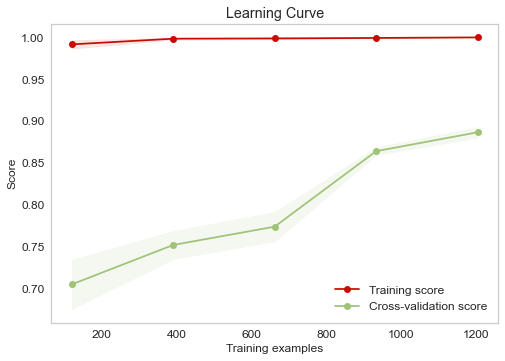

In [67]:
print("ROC AUC CURVE")
plt.figure(figsize=(12,8))
roc_auc(Xgb,X_train,y_train,X_test=X_test,y_test=y_test,classes=['Yes','No'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(Xgb,X_new,y_new,cv=skf,scoring='accuracy')
plt.show()

# Final model metrics

In [68]:
y_predicted=Xgb.predict(X_test)
print("Accuracy_score",accuracy_score(y_test,y_predicted))
print("CVS",cross_val_score(Xgb,X_new,y_new,scoring='accuracy',cv=skf).mean())
print("Confusion metrics")
print('\n')
print(confusion_matrix(y_test,y_predicted))
print('\n')
print("Classification Report")
print("\n")
print(classification_report(y_test,y_predicted))

Accuracy_score 0.8915929203539823
[03:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:42:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:42:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:42:26] WARNING: C:/Users/Adminis

# Saving model

In [69]:
import joblib
joblib.dump(Grid,"Automobile_insurance_fraud.obj")

['Automobile_insurance_fraud.obj']